In [2]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import io
from sklearn.preprocessing import MinMaxScaler
from sklearn import model_selection

import numpy as np

bike = pd.read_csv('C:\\Users\\pc\\Desktop\\판다스터디\\따릉이\\train.csv')
bike

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
5,13,2,13.6,0.0,1.7,80.0,1073.0,0.027,34.0,15.0,39.0
6,14,3,10.6,0.0,1.5,58.0,1548.0,0.038,62.0,33.0,23.0
7,16,21,16.0,0.0,6.0,21.0,1961.0,0.050,90.0,28.0,146.0
8,19,9,13.8,0.0,1.9,64.0,1344.0,0.039,93.0,19.0,39.0
9,20,14,17.2,0.0,2.1,32.0,1571.0,0.025,64.0,19.0,83.0


In [3]:
print(bike.info())
print('\n')
print(bike.shape)
print("dtype")
print(bike.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
id                        1459 non-null int64
hour                      1459 non-null int64
hour_bef_temperature      1457 non-null float64
hour_bef_precipitation    1457 non-null float64
hour_bef_windspeed        1450 non-null float64
hour_bef_humidity         1457 non-null float64
hour_bef_visibility       1457 non-null float64
hour_bef_ozone            1383 non-null float64
hour_bef_pm10             1369 non-null float64
hour_bef_pm2.5            1342 non-null float64
count                     1459 non-null float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB
None


(1459, 11)
dtype
id                          int64
hour                        int64
hour_bef_temperature      float64
hour_bef_precipitation    float64
hour_bef_windspeed        float64
hour_bef_humidity         float64
hour_bef_visibility       float64
hour_bef_ozone            float64
hour_bef_pm10        

In [4]:
bike.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


In [5]:
print(bike.isnull().sum(axis=0))

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64


In [6]:
mean_bike = bike.mean(axis=0)   
bike_full = bike.fillna(mean_bike, inplace=False)
print(bike_full.isnull().sum(axis=0))

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
dtype: int64


In [7]:
print(bike['hour_bef_pm10'].mean())
print(bike['hour_bef_pm2.5'].mean())
print(bike['hour_bef_ozone'].mean())
print('\n')
print(bike_full['hour_bef_pm10'].mean())
print(bike_full['hour_bef_pm2.5'].mean())
print(bike_full['hour_bef_ozone'].mean())


57.16873630387144
30.327123695976155
0.03914895155459139


57.168736303871405
30.32712369597621
0.03914895155459139


In [8]:
bike_dup = bike.duplicated() 
print(bike_dup.sum(axis=0))

0


In [9]:
bike_count = bike_full['count']


In [10]:
bike.corr()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
id,1.000000,-0.010901,-0.000029,-0.056267,-0.003353,-0.017948,0.008950,0.055234,-0.025510,0.003545,-0.002131
hour,-0.010901,1.000000,0.407306,0.021646,0.462797,-0.329612,0.176491,0.390188,-0.035907,-0.061229,0.626047
hour_bef_temperature,-0.000029,0.407306,1.000000,-0.097056,0.375618,-0.496088,0.197417,0.541228,-0.003830,-0.078665,0.619404
hour_bef_precipitation,-0.056267,0.021646,-0.097056,1.000000,0.022746,0.276481,-0.217155,-0.062461,-0.051266,0.004742,-0.163985
hour_bef_windspeed,-0.003353,0.462797,0.375618,0.022746,1.000000,-0.433012,0.252092,0.520526,0.010176,-0.199113,0.459906
hour_bef_humidity,-0.017948,-0.329612,-0.496088,0.276481,-0.433012,1.000000,-0.592244,-0.421047,-0.108106,0.167736,-0.471142
hour_bef_visibility,0.008950,0.176491,0.197417,-0.217155,0.252092,-0.592244,1.000000,0.101899,-0.403277,-0.644989,0.299094
hour_bef_ozone,0.055234,0.390188,0.541228,-0.062461,0.520526,-0.421047,0.101899,1.000000,0.113015,0.017313,0.477614
hour_bef_pm10,-0.025510,-0.035907,-0.003830,-0.051266,0.010176,-0.108106,-0.403277,0.113015,1.000000,0.489558,-0.114288
hour_bef_pm2.5,0.003545,-0.061229,-0.078665,0.004742,-0.199113,0.167736,-0.644989,0.017313,0.489558,1.000000,-0.134293


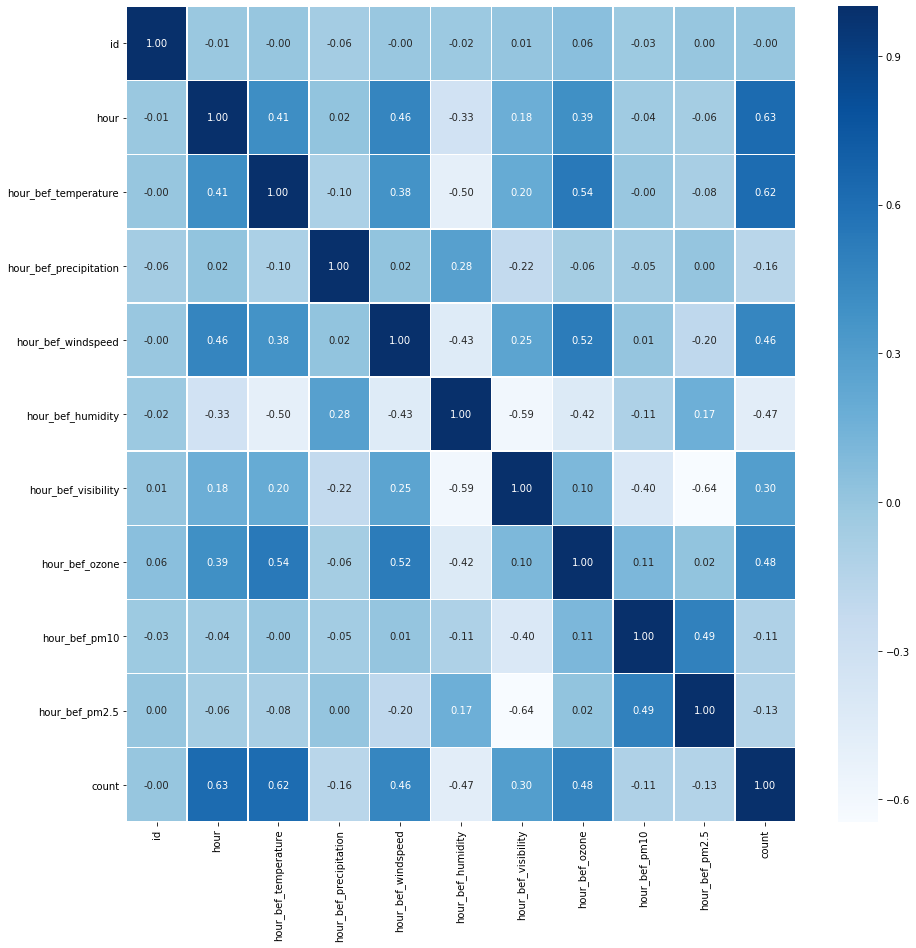

In [11]:
# correlation coefficient heatmap
plt.figure(figsize=(15,15))
sns.heatmap(bike.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')
plt.show()

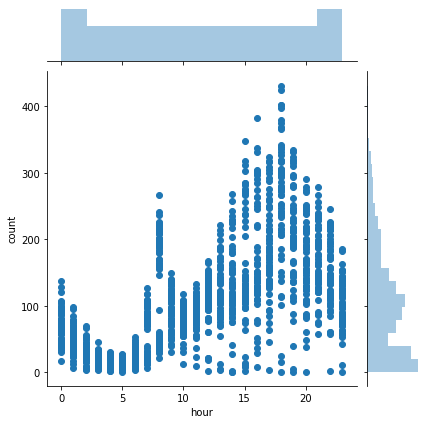

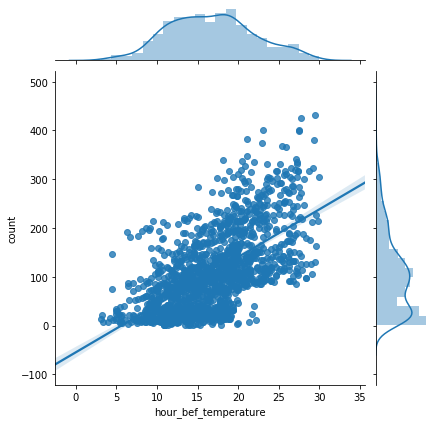

In [12]:
# seaborn 조인트 그래프 - 산점도, 히스토그램
sns.jointplot(x='hour', y='count', data=bike)              # 회귀선 없음
sns.jointplot(x='hour_bef_temperature', y='count', kind='reg', data=bike)  # 회귀선 표시 kind = reg
plt.show()
plt.close()

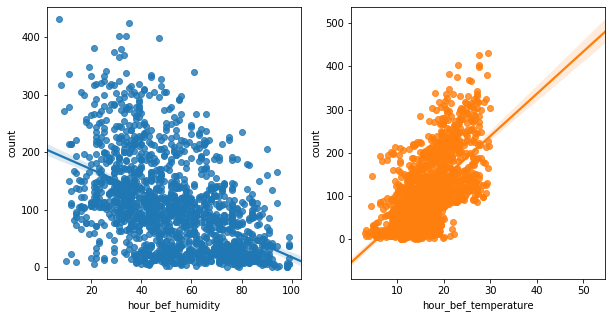

In [13]:
# seaborn으로 산점도 그리기
fig = plt.figure(figsize=(10, 5))   
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sns.regplot(x='hour_bef_humidity', y='count', data=bike, ax=ax1)                 # 회귀선 표시
sns.regplot(x='hour_bef_temperature', y='count', data=bike, ax=ax2)  #회귀선 미표시 fit_reg = false
plt.show()
plt.close()

In [14]:
idx = bike.columns
idx

Index(['id', 'hour', 'hour_bef_temperature', 'hour_bef_precipitation',
       'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility',
       'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5', 'count'],
      dtype='object')

In [23]:
train = bike
test = pd.read_csv('C:\\Users\\pc\\Desktop\\판다스터디\\따릉이\\test.csv')

test['count'] = 0
test
print(train.info())
print(test.info())

mean_test = test.mean(axis=0)   
test_full = test.fillna(mean_test, inplace=False)
test_full

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
id                        1459 non-null int64
hour                      1459 non-null int64
hour_bef_temperature      1457 non-null float64
hour_bef_precipitation    1457 non-null float64
hour_bef_windspeed        1450 non-null float64
hour_bef_humidity         1457 non-null float64
hour_bef_visibility       1457 non-null float64
hour_bef_ozone            1383 non-null float64
hour_bef_pm10             1369 non-null float64
hour_bef_pm2.5            1342 non-null float64
count                     1459 non-null float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 11 columns):
id                        715 non-null int64
hour                      715 non-null int64
hour_bef_temperature      714 non-null float64
hour_bef_precipitation    714 non-null float64
hour_bef_windspeed     

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041000,44.000000,27.000000,0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061000,49.000000,36.000000,0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020000,36.000000,28.000000,0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027000,52.000000,38.000000,0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041000,18.000000,15.000000,0
5,10,9,20.2,0.0,4.3,39.0,2000.0,0.034000,22.000000,7.000000,0
6,11,18,19.0,0.0,2.7,80.0,2000.0,0.028000,17.000000,12.000000,0
7,12,18,31.2,0.0,2.2,42.0,621.0,0.117000,94.000000,69.000000,0
8,15,6,20.1,0.0,0.8,78.0,463.0,0.026000,57.000000,33.000000,0
9,17,8,17.0,1.0,0.9,100.0,200.0,0.022000,12.000000,12.000000,0


In [24]:
#데이터 정규화 y?
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
bike_scaled = scaler.fit_transform(bike_full)
train=bike_scaled
test = scaler.fit_transform(test_full)
test
train = pd.DataFrame(train)

test = pd.DataFrame(test)
train.columns = idx
train
test.columns = idx
test['count']=0
test
train

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,0.000000,0.869565,0.490706,1.0,0.187500,0.891304,0.259105,0.196721,0.257692,0.304878,0.111628
1,0.001379,0.565217,0.631970,0.0,0.175000,0.445652,0.436004,0.319672,0.246154,0.390244,0.367442
2,0.001838,0.260870,0.401487,0.0,0.087500,0.782609,0.678460,0.245902,0.088462,0.134146,0.058140
3,0.002298,1.000000,0.185874,0.0,0.337500,0.510870,0.451613,0.303279,0.253846,0.682927,0.130233
4,0.002757,0.782609,0.981413,0.0,0.600000,0.000000,1.000000,0.442623,0.069231,0.036585,1.000000
5,0.004596,0.086957,0.390335,0.0,0.212500,0.793478,0.517690,0.196721,0.096154,0.085366,0.088372
6,0.005055,0.130435,0.278810,0.0,0.187500,0.554348,0.764828,0.286885,0.203846,0.304878,0.051163
7,0.005974,0.913043,0.479554,0.0,0.750000,0.152174,0.979709,0.385246,0.311538,0.243902,0.337209
8,0.007353,0.391304,0.397770,0.0,0.237500,0.619565,0.658689,0.295082,0.323077,0.134146,0.088372
9,0.007812,0.608696,0.524164,0.0,0.262500,0.271739,0.776795,0.180328,0.211538,0.134146,0.190698


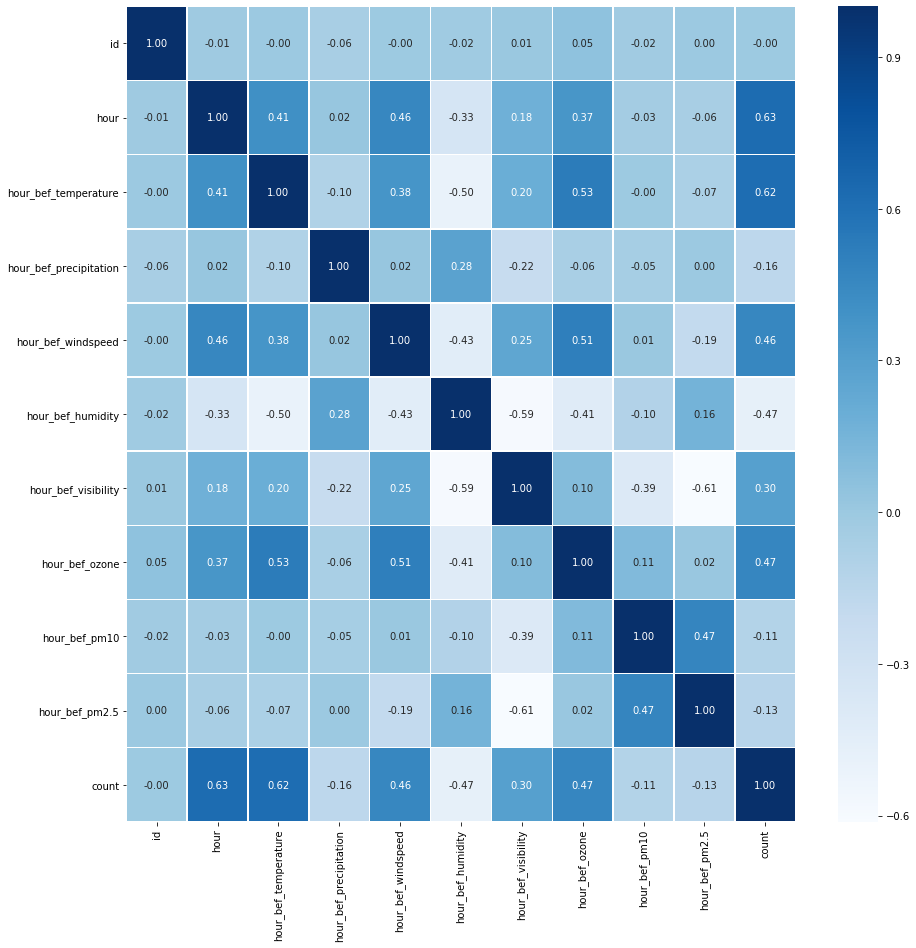

In [17]:
# correlation coefficient heatmap
plt.figure(figsize=(15,15))
sns.heatmap(train.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')
plt.show()

In [36]:
y = train['count']
x = train.iloc[: ,1:10]

x_test = test.iloc[: ,1:10]
#y_train
#y_train = pd.DataFrame(y_train)

y_test = test['count']
x_0 = sm.add_constant(x)
y


0       0.111628
1       0.367442
2       0.058140
3       0.130233
4       1.000000
5       0.088372
6       0.051163
7       0.337209
8       0.088372
9       0.190698
10      0.011628
11      0.095349
12      0.134884
13      0.137209
14      0.169767
15      0.009302
16      0.502326
17      0.146512
18      0.481395
19      0.032558
20      0.132558
21      0.483721
22      0.281395
23      0.200000
24      0.067442
25      0.076744
26      0.065116
27      0.039535
28      0.244186
29      0.020930
          ...   
1429    0.332558
1430    0.751163
1431    0.069767
1432    0.239535
1433    0.030233
1434    0.346512
1435    0.504651
1436    0.560465
1437    0.151163
1438    0.241860
1439    0.413953
1440    0.325581
1441    0.276744
1442    0.553488
1443    0.009302
1444    0.274419
1445    0.465116
1446    0.053488
1447    0.630233
1448    0.262791
1449    0.023256
1450    0.616279
1451    0.058140
1452    0.016279
1453    0.702326
1454    0.046512
1455    0.044186
1456    0.0488

In [34]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10) 


In [30]:
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()   
# train data를 가지고 모형 학습
lr.fit(x_train, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(x_test, y_test)
print(r_square)
print('\n')


0.5479502337673852




X 변수의 계수 a:  [ 0.24888117  0.33596654 -0.12637301  0.08625417 -0.05373969  0.04566923
  0.12576941 -0.18593805  0.03406549]


상수항 b -0.08359350936464699




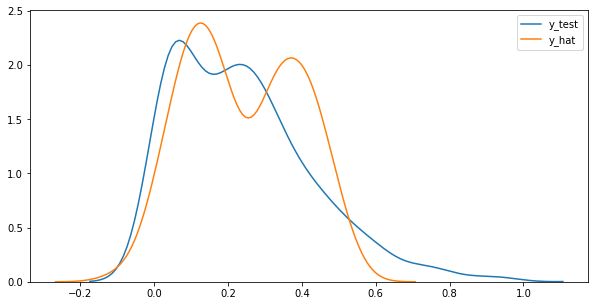

In [31]:
# 회귀식의 기울기
print('X 변수의 계수 a: ', lr.coef_) #'cylinders', 'horsepower', 'weight' 
print('\n')

# 회귀식의 y절편
print('상수항 b', lr.intercept_)
print('\n')

# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력 
y_hat = lr.predict(x_test)

plt.figure(figsize=(10, 5))
ax1 = sns.kdeplot(y_test, label="y_test")
ax2 = sns.kdeplot(y_hat, label="y_hat", ax=ax1)
plt.legend()
plt.show()

In [32]:
model_Bike = sm.OLS(y,x_0)
result_Bike = model_Bike.fit()
result_Bike.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     241.7
Date:                Mon, 06 Feb 2023   Prob (F-statistic):          4.76e-281
Time:                        11:53:43   Log-Likelihood:                 1005.6
No. Observations:                1459   AIC:                            -1991.
Df Residuals:                    1449   BIC:                            -1938.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.0552      0.035     -1.556      0.120      -0.125       0.014
hour                       0.2520      0.013     20.009      0.000       0.227       0.277
hour_bef_temperature       0.3313      0.022     15.350      0.000       0.289       0.374
hour_bef_precipitation    -0.1267      0.019     -6.511      0.000      -0.165      -0.089
hour_bef_windspeed         0.0890      0.024      3.661      0.000       0.041       0.137
hour_bef_humidity         -0.0596      0.025     -2.386      0.017      -0.109      -0.011
hour_bef_visibility        0.0242      0.019      1.263      0.207      -0.013       0.062
hour_bef_ozone             0.0961      0.027      3.560      0.000       0.043       0.149
hour_bef_pm10             -0.1843      0.034     -5.401      0.000      -0.251      -0.117
hour_bef_pm2.5             0.0234      0.026      0.899      0.369      -0.028       0.074
==============================================================================
Omnibus:                      202.268   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              339.258
Skew:                           0.909   Prob(JB):                     2.14e-74
Kurtosis:                       4.508   Cond. No.                         25.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""